In [1]:
# Data Collection
import requests  # For fetching web pages
from bs4 import BeautifulSoup  # For parsing HTML
import pandas as pd  # For storing data in DataFrames
import json  # For handling JSON data (for APIs)
import numpy as np

# Text Preprocessing
import nltk  # For tokenization, stopwords, lemmatization
import string  # For handling punctuation
import re  # For regular expressions (optional, for text cleaning)

# Sentiment Analysis
from nltk.sentiment import SentimentIntensityAnalyzer  # For VADER sentiment analysis
from textblob import TextBlob  # Alternative sentiment analysis library (optiona

# Visualization
import matplotlib.pyplot as plt  # For plotting data visualizations
import seaborn as sns  # For advanced visualization
from wordcloud import WordCloud  # For generating word clouds



In [31]:
df = pd.read_csv('Tyler The Creator Dataset.csv')
df


,artist_name,track_name,track_id,album_name,album_id,release_date,popularity,explicit,danceability,energy,...,liveness,valence,tempo,time_signature,featured_artists,type,duration,year,month,day_of_the_week
0,"Tyler, The Creator",EARFQUAKE,5hVghJ4KaYES3BFUATCYn0,IGOR,5zi7WsKlIiUXv09tbGLKsE,2019-05-17,82,True,0.554,0.498,...,0.795,0.413,79.635,4,NaN,Studio Album,03:10,2019,May,Friday
1,"Tyler, The Creator",Thought I Was Dead (feat. ScHoolboy Q & Santig...,2aYHxnMF2umAavtgBvmkY1,CHROMAKOPIA,0U28P0QVB1QRxpqp5IHOlH,2024-10-28,81,True,0.770,0.859,...,0.673,0.640,129.770,4,"ScHoolboy Q, Santigold",Studio Album,03:27,2024,October,Monday
2,"Tyler, The Creator",See You Again (feat. Kali Uchis),7KA4W4McWYRpgf0fWsJZWB,Flower Boy,2nkto6YNI4rUYTLqEwWJ3o,2017-07-21,89,True,0.558,0.559,...,0.109,0.620,78.558,4,Kali Uchis,Studio Album,03:00,2017,July,Friday
3,"Tyler, The Creator",BEST INTEREST,3jHdKaLCkuNEkWcLVmQPCX,BEST INTEREST,5iUwaD3wFVwfaAfs9Z0eCh,2020-01-25,83,True,0.596,0.575,...,0.334,0.340,98.265,3,NaN,Single,02:07,2020,January,Saturday
4,"Tyler, The Creator",Noid,1YdtGoSYDvVQKoUqSDXX41,CHROMAKOPIA,0U28P0QVB1QRxpqp5IHOlH,2024-10-28,82,True,0.380,0.784,...,0.494,0.418,82.318,4,NaN,Studio Album,04:44,2024,October,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,Casey Veggies,DTA,6SfqAuzvIHbERSO5c613P0,Sleeping in Class,5VQnHe5Wcji6wNbiAnMQ21,2011-09-20,49,False,0.366,0.946,...,0.178,0.706,160.815,4,"Tyler, The Creator",Feature,04:00,2011,September,Tuesday
266,MellowHype,F666 the Police,0MfIT9RpAUGHjol2iQzXiq,Blackenedwhite,7KLG5Qk1Y9gLzSjdNdR96l,2011-07-12,21,True,0.520,0.663,...,0.439,0.276,125.315,4,NaN,Feature,03:12,2011,July,Tuesday
267,The Game,Martians Vs Goblins,1UIcqXAA24eg76EFWViwr5,The R.E.D. Album,6PvZnd9Q2ymDo3gpoM5I37,2011-01-01,51,True,0.476,0.810,...,0.568,0.642,83.309,4,"Lil Wayne, Tyler, The Creator",Feature,03:48,2011,January,Saturday
268,Mike G,Timeless,5GYJvoJUMVyikb2D5sUwVg,Ali,5cVudF06zoMgAbXIRkk6aR,2010-04-11,20,True,0.606,0.767,...,0.119,0.689,79.920,4,NaN,Feature,03:11,2010,April,Sunday


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       270 non-null    object 
 1   track_name        270 non-null    object 
 2   track_id          270 non-null    object 
 3   album_name        270 non-null    object 
 4   album_id          270 non-null    object 
 5   release_date      270 non-null    object 
 6   popularity        270 non-null    int64  
 7   explicit          270 non-null    bool   
 8   danceability      270 non-null    float64
 9   energy            270 non-null    float64
 10  key               270 non-null    object 
 11  loudness          270 non-null    float64
 12  mode              270 non-null    object 
 13  speechiness       270 non-null    float64
 14  acousticness      270 non-null    float64
 15  instrumentalness  270 non-null    float64
 16  liveness          270 non-null    float64
 1

In [8]:
df.isna().sum()

artist_name           0
track_name            0
track_id              0
album_name            0
album_id              0
release_date          0
popularity            0
explicit              0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
featured_artists    135
type                  0
duration              0
year                  0
month                 0
day_of_the_week       0
dtype: int64

In [32]:
# Filling na values of eachf featured artist column as solo
df['featured_artists'] = df['featured_artists'].fillna('No listed features')


In [10]:
df.duplicated().sum()

6

In [33]:
df = df.drop_duplicates()

# EDA

## Most popular song

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


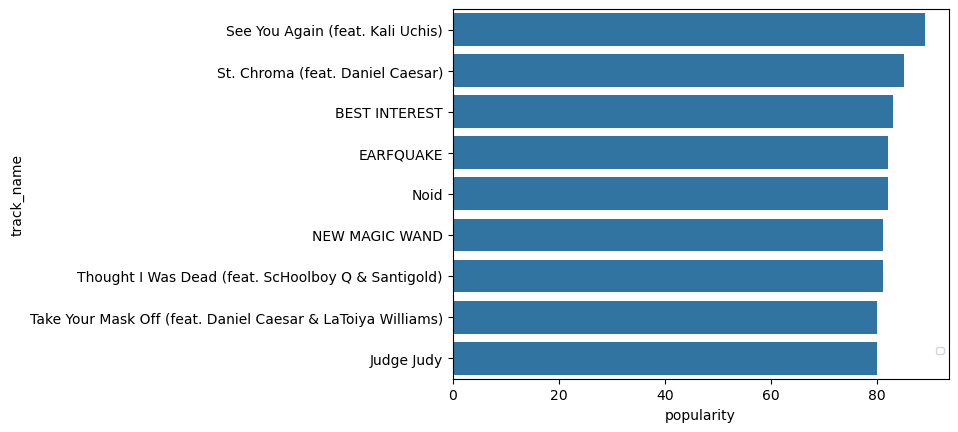

In [88]:
sns.barplot(df.sort_values('popularity', ascending=False).head(10), y='track_name', x ='popularity')
plt.legend(bbox_to_anchor = (1,0.1),fontsize=7)

In [35]:
df.columns

Index(['artist_name', 'track_name', 'track_id', 'album_name', 'album_id',
       'release_date', 'popularity', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'featured_artists', 'type', 'duration', 'year', 'month',
       'day_of_the_week'],
      dtype='object')

## What makes tyler music

In [40]:
import math

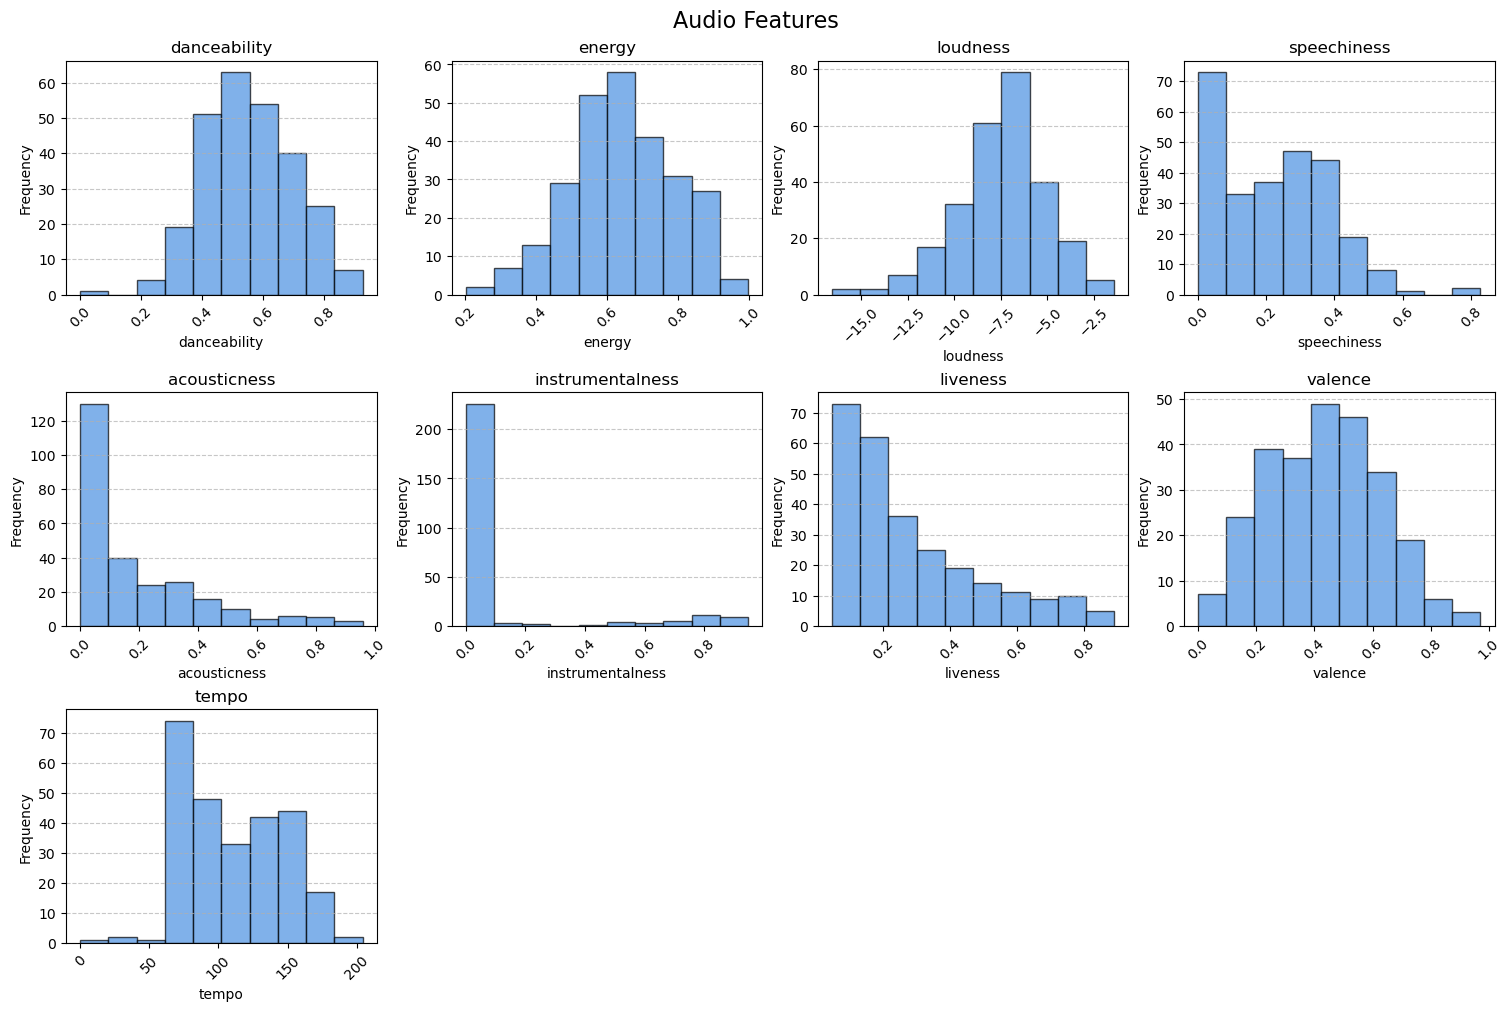

In [140]:
list_columns_feeatures = ['danceability', 'energy', 'loudness','speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']
num_cols = len(list_columns_feeatures)

# Determine grid size
cols = 4  # Fixed number of columns in the subplot grid
rows = math.ceil(num_cols / cols)  # Calculate the required rows

# Create the figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(15, 10), constrained_layout=True)
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each histogram
for i, col in enumerate(list_columns_feeatures):
    axes[i].hist(df[col].dropna(), bins=10, color='#4a90e2', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'{col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Add an overall title
fig.suptitle('Audio Features', fontsize=16)

# Display the plot
plt.show()

# Getting each decade

## Get genre

In [15]:
# Getting genre from last.fm (user inputted)
# Function to fetch genres for a given song and artist  
def fetch_genres(track_name, artist_name):
    api_key = 'c3a0a59bf602e83267467d0a1692c352'
    url = f"http://ws.audioscrobbler.com/2.0/?method=track.getInfo&api_key={api_key}&artist={artist_name}&track={track_name}&format=json"  
    response = requests.get(url)  
    data = response.json()  

    # Extract genres from the response  
    if 'track' in data and 'toptags' in data['track']:  
        genres = [tag['name'] for tag in data['track']['toptags']['tag']]  
        return ', '.join(genres)  
    else:  
        return 'No genres found'  





In [16]:
# Loop through each row in the DataFrame  
df['genres'] = None  
for index, row in df.iterrows():  
    track_name = row['track_name']  
    artist_name = row['artist_name']  
    
    # Fetch genres and update the DataFrame  
    genres = fetch_genres(track_name, artist_name)  
    df.at[index, 'genres'] = genres  

    # Optional: Print progress  
    print(f"Fetched genres for {track_name} by {artist_name}: {genres}")  

df

C:\Users\User\AppData\Local\Temp\ipykernel_3236\3087579188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres'] = None


Fetched genres for EARFQUAKE by Tyler, The Creator: MySpotigramBot, Neo-Soul, alternative rnb, alternative, rap
Fetched genres for Thought I Was Dead (feat. ScHoolboy Q & Santigold) by Tyler, The Creator: No genres found
Fetched genres for See You Again (feat. Kali Uchis) by Tyler, The Creator: MySpotigramBot, rap, rnb, Neo-Soul, kali uchis
Fetched genres for BEST INTEREST by Tyler, The Creator: MySpotigramBot, Neo-Soul, pop rap, pop soul, tyler the creator
Fetched genres for Noid by Tyler, The Creator: Psychedelic Rock, experimental hip hop, Neo-Soul, zamrock, hip hop
Fetched genres for ARE WE STILL FRIENDS? by Tyler, The Creator: MySpotigramBot, Neo-Soul, Psychedelic Soul, soul, Neo-Psychedelia
Fetched genres for Noid by Tyler, The Creator: Psychedelic Rock, experimental hip hop, Neo-Soul, zamrock, hip hop
Fetched genres for St. Chroma (feat. Daniel Caesar) by Tyler, The Creator: experimental hip hop, Neo-Soul, Neo-Psychedelia, hardcore hip hop, industrial hip hop
Fetched genres for 

,artist_name,track_name,track_id,album_name,album_id,release_date,popularity,explicit,danceability,energy,...,valence,tempo,time_signature,featured_artists,type,duration,year,month,day_of_the_week,genres
0,"Tyler, The Creator",EARFQUAKE,5hVghJ4KaYES3BFUATCYn0,IGOR,5zi7WsKlIiUXv09tbGLKsE,2019-05-17,82,True,0.554,0.498,...,0.413,79.635,4,No listed features,Studio Album,03:10,2019,May,Friday,"MySpotigramBot, Neo-Soul, alternative rnb, alt..."
1,"Tyler, The Creator",Thought I Was Dead (feat. ScHoolboy Q & Santig...,2aYHxnMF2umAavtgBvmkY1,CHROMAKOPIA,0U28P0QVB1QRxpqp5IHOlH,2024-10-28,81,True,0.770,0.859,...,0.640,129.770,4,"ScHoolboy Q, Santigold",Studio Album,03:27,2024,October,Monday,No genres found
2,"Tyler, The Creator",See You Again (feat. Kali Uchis),7KA4W4McWYRpgf0fWsJZWB,Flower Boy,2nkto6YNI4rUYTLqEwWJ3o,2017-07-21,89,True,0.558,0.559,...,0.620,78.558,4,Kali Uchis,Studio Album,03:00,2017,July,Friday,"MySpotigramBot, rap, rnb, Neo-Soul, kali uchis"
3,"Tyler, The Creator",BEST INTEREST,3jHdKaLCkuNEkWcLVmQPCX,BEST INTEREST,5iUwaD3wFVwfaAfs9Z0eCh,2020-01-25,83,True,0.596,0.575,...,0.340,98.265,3,No listed features,Single,02:07,2020,January,Saturday,"MySpotigramBot, Neo-Soul, pop rap, pop soul, t..."
4,"Tyler, The Creator",Noid,1YdtGoSYDvVQKoUqSDXX41,CHROMAKOPIA,0U28P0QVB1QRxpqp5IHOlH,2024-10-28,82,True,0.380,0.784,...,0.418,82.318,4,No listed features,Studio Album,04:44,2024,October,Monday,"Psychedelic Rock, experimental hip hop, Neo-So..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,Casey Veggies,DTA,6SfqAuzvIHbERSO5c613P0,Sleeping in Class,5VQnHe5Wcji6wNbiAnMQ21,2011-09-20,49,False,0.366,0.946,...,0.706,160.815,4,"Tyler, The Creator",Feature,04:00,2011,September,Tuesday,
266,MellowHype,F666 the Police,0MfIT9RpAUGHjol2iQzXiq,Blackenedwhite,7KLG5Qk1Y9gLzSjdNdR96l,2011-07-12,21,True,0.520,0.663,...,0.276,125.315,4,No listed features,Feature,03:12,2011,July,Tuesday,"Hip-Hop, alternative hip-hop"
267,The Game,Martians Vs Goblins,1UIcqXAA24eg76EFWViwr5,The R.E.D. Album,6PvZnd9Q2ymDo3gpoM5I37,2011-01-01,51,True,0.476,0.810,...,0.642,83.309,4,"Lil Wayne, Tyler, The Creator",Feature,03:48,2011,January,Saturday,"rap, Hip-Hop, 2010s, fucking, good rap"
268,Mike G,Timeless,5GYJvoJUMVyikb2D5sUwVg,Ali,5cVudF06zoMgAbXIRkk6aR,2010-04-11,20,True,0.606,0.767,...,0.689,79.920,4,No listed features,Feature,03:11,2010,April,Sunday,banned


## Getting lyrics

In [3]:
from time import sleep  
from langdetect import detect

In [4]:
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.decomposition import LatentDirichletAllocation 


In [5]:
# Download necessary NLTK resources  
nltk.download('punkt_tab', quiet=True)  
nltk.download('stopwords', quiet=True)  


True

In [20]:
import lyricsgenius   

# Initialize Genius API client  
# You'll need to get your own API token from https://genius.com/api-clients  
genius = lyricsgenius.Genius('vRxfeL5ZGn03Dt-Uby4CPCy2RghptIPoJnaTJKWhOix22PFI09I_rR6OVEiyyK-K')  

In [21]:
# Function removing unnecessary text
def clean_lyrics(lyrics):  
    # Remove any annotations or metadata  
    lyrics = re.sub(r'\[.*?\]', '', lyrics)  # Remove anything in brackets  
    lyrics = re.sub(r'\n+', '\n', lyrics)  # Remove extra newlines  
    lyrics = lyrics.strip()  # Remove leading and trailing whitespace  
    
    # Remove unwanted text patterns  
    lyrics = re.sub(r'\d+\s*Contributors.*', '', lyrics)  # Remove contributor info  
    lyrics = re.sub(r'Translations.*', '', lyrics)  # Remove translations info  
    lyrics = re.sub(r'\s*Español|Deutsch|Українська|Norsk|Français.*', '', lyrics)  # Remove language names  
    
    # Remove any remaining unwanted characters or patterns  
    lyrics = re.sub(r'\s+', ' ', lyrics)  # Replace multiple spaces with a single space  
    
    return lyrics.strip()

In [22]:
def fetch_lyrics(track_name, artist_name, language="en"):  
    try:
        # Search for the song on Genius
        song = genius.search_song(track_name, artist_name)
        
        # If the song is found, get the lyrics
        if song:
            lyrics = song.lyrics
            
            # Check if the lyrics are in the desired language
            detected_language = detect(lyrics)
            if detected_language == language:
                lyrics = clean_lyrics(lyrics)
                return lyrics
            else:
                print(f"Skipping {track_name} by {artist_name} - Detected language: {detected_language}")
                return None
        else:
            return 'Lyrics not found'
    except Exception as e:
        return f'Error: {str(e)}'

There are some data that are miss-scrapped using the non english version, we will fix that

In [ ]:
#df['lyrics'] = None  

# Loop through each row in the DataFrame  
#for index, row in df.iterrows():  
    # track_name = row['track_name']  
    # artist_name = row['artist_name']  
    
    # # Fetch lyrics and update the DataFrame  
    # lyrics = fetch_lyrics(track_name, artist_name)  
    # df.at[index, 'lyrics'] = lyrics  

    # # Optional: Print progress  
    # print(f"Fetched lyrics for {track_name} by {artist_name}")  

    # # Sleep to respect API rate limits  
    # sleep(1)  

C:\Users\User\AppData\Local\Temp\ipykernel_3236\2338526940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lyrics'] = None


Searching for "EARFQUAKE" by Tyler, The Creator...
Done.
Fetched lyrics for EARFQUAKE by Tyler, The Creator
Searching for "Thought I Was Dead (feat. ScHoolboy Q & Santigold)" by Tyler, The Creator...
Done.
Skipping Thought I Was Dead (feat. ScHoolboy Q & Santigold) by Tyler, The Creator - Detected language: pt
Fetched lyrics for Thought I Was Dead (feat. ScHoolboy Q & Santigold) by Tyler, The Creator
Searching for "See You Again (feat. Kali Uchis)" by Tyler, The Creator...
Done.
Fetched lyrics for See You Again (feat. Kali Uchis) by Tyler, The Creator
Searching for "BEST INTEREST" by Tyler, The Creator...
Done.
Fetched lyrics for BEST INTEREST by Tyler, The Creator
Searching for "Noid" by Tyler, The Creator...
Done.
Fetched lyrics for Noid by Tyler, The Creator
Searching for "ARE WE STILL FRIENDS?" by Tyler, The Creator...
Done.
Fetched lyrics for ARE WE STILL FRIENDS? by Tyler, The Creator
Searching for "Noid" by Tyler, The Creator...
Done.
Fetched lyrics for Noid by Tyler, The Creato

In [24]:
df

,artist_name,track_name,track_id,album_name,album_id,release_date,popularity,explicit,danceability,energy,...,tempo,time_signature,featured_artists,type,duration,year,month,day_of_the_week,genres,lyrics
0,"Tyler, The Creator",EARFQUAKE,5hVghJ4KaYES3BFUATCYn0,IGOR,5zi7WsKlIiUXv09tbGLKsE,2019-05-17,82,True,0.554,0.498,...,79.635,4,No listed features,Studio Album,03:10,2019,May,Friday,"MySpotigramBot, Neo-Soul, alternative rnb, alt...","For real, for real this time For real, for rea..."
1,"Tyler, The Creator",Thought I Was Dead (feat. ScHoolboy Q & Santig...,2aYHxnMF2umAavtgBvmkY1,CHROMAKOPIA,0U28P0QVB1QRxpqp5IHOlH,2024-10-28,81,True,0.770,0.859,...,129.770,4,"ScHoolboy Q, Santigold",Studio Album,03:27,2024,October,Monday,No genres found,None
2,"Tyler, The Creator",See You Again (feat. Kali Uchis),7KA4W4McWYRpgf0fWsJZWB,Flower Boy,2nkto6YNI4rUYTLqEwWJ3o,2017-07-21,89,True,0.558,0.559,...,78.558,4,Kali Uchis,Studio Album,03:00,2017,July,Friday,"MySpotigramBot, rap, rnb, Neo-Soul, kali uchis","Okay, okay, okay, okay, okay, okay, o— You liv..."
3,"Tyler, The Creator",BEST INTEREST,3jHdKaLCkuNEkWcLVmQPCX,BEST INTEREST,5iUwaD3wFVwfaAfs9Z0eCh,2020-01-25,83,True,0.596,0.575,...,98.265,3,No listed features,Single,02:07,2020,January,Saturday,"MySpotigramBot, Neo-Soul, pop rap, pop soul, t...","Darling, darling, darling It's no need to worr..."
4,"Tyler, The Creator",Noid,1YdtGoSYDvVQKoUqSDXX41,CHROMAKOPIA,0U28P0QVB1QRxpqp5IHOlH,2024-10-28,82,True,0.380,0.784,...,82.318,4,No listed features,Studio Album,04:44,2024,October,Monday,"Psychedelic Rock, experimental hip hop, Neo-So...","Paranoid, paranoid, paranoid (Ayy) Things feel..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,Casey Veggies,DTA,6SfqAuzvIHbERSO5c613P0,Sleeping in Class,5VQnHe5Wcji6wNbiAnMQ21,2011-09-20,49,False,0.366,0.946,...,160.815,4,"Tyler, The Creator",Feature,04:00,2011,September,Tuesday,,"Ay, aw man, hey I said it, I said it, and I'll..."
266,MellowHype,F666 the Police,0MfIT9RpAUGHjol2iQzXiq,Blackenedwhite,7KLG5Qk1Y9gLzSjdNdR96l,2011-07-12,21,True,0.520,0.663,...,125.315,4,No listed features,Feature,03:12,2011,July,Tuesday,"Hip-Hop, alternative hip-hop",Lyrics not found
267,The Game,Martians Vs Goblins,1UIcqXAA24eg76EFWViwr5,The R.E.D. Album,6PvZnd9Q2ymDo3gpoM5I37,2011-01-01,51,True,0.476,0.810,...,83.309,4,"Lil Wayne, Tyler, The Creator",Feature,03:48,2011,January,Saturday,"rap, Hip-Hop, 2010s, fucking, good rap",1500 Mars.. (Bitch I'm a motherfuckin' martian...
268,Mike G,Timeless,5GYJvoJUMVyikb2D5sUwVg,Ali,5cVudF06zoMgAbXIRkk6aR,2010-04-11,20,True,0.606,0.767,...,79.920,4,No listed features,Feature,03:11,2010,April,Sunday,banned,I could spend my whole life tryna get cash And...


In [2]:
df = pd.read_csv('tylerlyrics.csv').drop(columns='Unnamed: 0')

In [3]:
#Dropping none values
df_lyrics = df.dropna(subset='lyrics')

# Preprocess

In [4]:
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
base_stopwords = {  
        # Common English stop words  
        'a', 'an', 'and', 'are', 'as', 'at', 'be', 'by', 'for', 'from',   
        'has', 'he', 'in', 'is', 'it', 'its', 'of', 'on', 'that', 'the',   
        'to', 'was', 'were', 'will', 'with',  
        
        # Pronouns  
        'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves',   
        'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him',   
        'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its',   
        'itself', 'they', 'them', 'their', 'theirs', 'themselves',  
        
        # Auxiliary verbs and modals  
        'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being',   
        'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing',  
        'can', 'could', 'will', 'would', 'shall', 'should', 'may',   
        'might', 'must', 'ought',  
        
        # Prepositions  
        'about', 'above', 'after', 'again', 'against', 'all', 'am',   
        'an', 'and', 'any', 'are', 'as', 'at', 'be', 'because',   
        'been', 'before', 'being', 'below', 'between', 'both', 'but',   
        'by', 'could', 'did', 'do', 'does', 'doing', 'down', 'during',   
        'each', 'few', 'for', 'from', 'further', 'had', 'has', 'have',   
        'having', 'he', 'her', 'here', 'hers', 'herself', 'him',   
        'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'it',   
        'its', 'itself', 'let', 'me', 'more', 'most', 'my', 'myself',   
        'nor', 'not', 'now', 'of', 'off', 'on', 'once', 'only', 'or',   
        'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'over',   
        'own', 'same', 'she', 'should', 'so', 'some', 'such', 'than',   
        'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then',   
        'there', 'these', 'they', 'this', 'those', 'through', 'to',   
        'too', 'under', 'until', 'up', 've', 'very', 'was', 'we',   
        'we', 'were', 'what', 'when', 'where', 'which', 'while',   
        'who', 'whom', 'why', 'with', 'you', 'your', 'yours',   
        'yourself', 'yourselves',  
    }  
    
# Music-specific stop words  
music_stopwords = {  
    # Common music filler words  
    'yeah', 'oh', 'ah', 'hey', 'na', 'gonna', 'wanna',   
    'cause', 'bout', 'gotta', 'ooh', 'uhh', 'mmm', 'aha',  
    'la', 'da', 'di', 'doo', 'na', 'eh', 'yo', 'nah',  
    
    # Emotional interjections  
    'baby', 'babe', 'girl', 'boy', 'yea', 'yeah',  
    
    # Repetitive lyrics markers  
    'chorus', 'verse', 'bridge', 'intro', 'outro',  
}  
hiphop_profanity_stopwords = {  
    # Common explicit words  
    'bitch', 'fuck', 'shit', 'ass', 'nigga', 'niggas', 'pussy',   
    'dick', 'cock', 'cunt', 'damn', 'hell', 'motherfucker',   
    'muthafucka', 'fuckboy', 'fuckgirl', 'whore', 'slut', 'fucking'
    
    # Variations and slang  
    'b*tch', 'f*ck', 's*hit', 'a$$', 'n*gga',   
    
    # Derogatory terms  
    'hoe', 'thot', 'banger', 'playa', 'dawg',   
    
    # Aggressive language  
    'kill', 'murder', 'shoot', 'bang', 'smash',   
    
    # Sexual references  
    'sex', 'porn', 'nude', 'naked', 'booty', 'titties',  
    
    # Drug-related slang  
    'weed', 'dope', 'crack', 'blunt', 'high', 'smoke',  
    
    # Violent slang  
    'glock', 'pistol', 'weapon', 'trigger', 'blood', 'gang'  
}  

# Grammatical noise  
grammar_noise = {  
    'like', 'just', 'really', 'very', 'so', 'too', 'now',   
    'still', 'ever', 'always', 'never', 'maybe', 'perhaps'  
}  

# Combine all stop words  
comprehensive_stopwords = (  
    base_stopwords  
    .union(music_stopwords)  
    .union(grammar_noise)  
    .union(hiphop_profanity_stopwords)  
)  


In [6]:
contractions_dict = {    
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i had",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "iit will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have",
    "2nd" : "second"
}


In [7]:
def expand_contractions(text, contractions_dict):
    """
    Expand contractions in the text using the contractions dictionary.
    """
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())), 
                                     flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        expanded = contractions_dict.get(match.lower(), match)
        return expanded
    expanded_text = contractions_pattern.sub(expand_match, text)
    return expanded_text

In [8]:


def preprocess_lyrics(text):
    """
    Preprocess lyrics for theme analysis

    Parameters:
    - text: Raw lyrics text

    Returns:
    - Cleaned and preprocessed text
    """
    # Prepare stop words
    stop_words = set(stopwords.words('english'))
    stop_words.update(comprehensive_stopwords)

    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Expand contractions
    text = expand_contractions(text, contractions_dict)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords and non-alphabetic tokens
    cleaned_tokens = [
        token for token in tokens
        if token.isalpha() and token not in stop_words
    ]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in cleaned_tokens]

    # Remove extra whitespace and join tokens
    cleaned_text = ' '.join(lemmatized_tokens).strip()
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)  # Remove extra spaces

    return cleaned_text

In [9]:
df_lyrics['lyrics'] = df_lyrics['lyrics'].apply(preprocess_lyrics)

In [10]:
df_lyrics['lyrics']

0      real real time real real real time fall short ...
1      okay okay okay okay okay okay live dream state...
2      darling darling darling need worry couple thin...
3      paranoid paranoid paranoid ayy thing feel orde...
4      dream dream long ago long ago long ago dream d...
                             ...                        
233    ay aw man said said ill say aw aw aw man right...
234                                          lyric found
235    mar im motherfuckin martian em odd future wolf...
236    spend whole life tryna get cash work hard pas ...
237    rock black tee step black shoe denim jean blac...
Name: lyrics, Length: 238, dtype: object

In [11]:
def word_freq(text):

    df_text = text.str.extractall('(\w+)') # ambil tiap kata dari tiap document
    df_text = df_text.reset_index()

    df_unique = df_text[0].value_counts()
    df_unique = df_unique.to_frame().reset_index().rename(columns={0:'word', 'count':'freq'})

    return df_unique

<>:3: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\w'
C:\Users\User\AppData\Local\Temp\ipykernel_8264\2153057262.py:3: SyntaxWarning: invalid escape sequence '\w'
  df_text = text.str.extractall('(\w+)') # ambil tiap kata dari tiap document


<Axes: xlabel='freq', ylabel='word'>

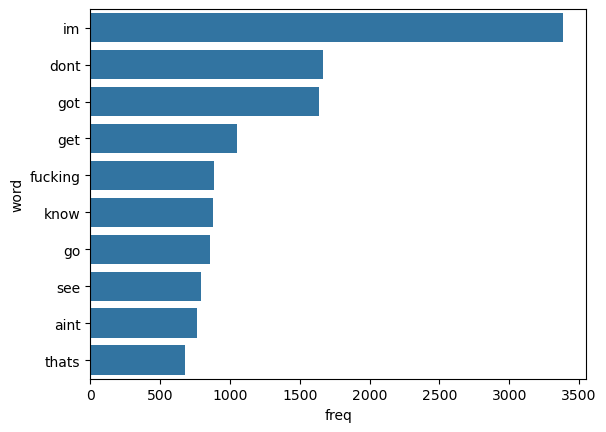

In [12]:
# Top 10 most frequent words
data = word_freq(df_lyrics['lyrics'])
sns.barplot(data=data.head(10), x='freq', y='word')

# Sentiment Analysis

In [13]:
# Download required NLTK data  
nltk.download('vader_lexicon') 
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df_sentiment = df_lyrics.copy().reset_index()
sid = SentimentIntensityAnalyzer()
df_sentiment['neg'] = df['lyrics'].apply(lambda x: sid.polarity_scores(x)['neg'])
df_sentiment['neu'] = df['lyrics'].apply(lambda x: sid.polarity_scores(x)['neu'])  
df_sentiment['pos'] = df['lyrics'].apply(lambda x: sid.polarity_scores(x)['pos'])
df_sentiment['compound'] = df['lyrics'].apply(lambda x: sid.polarity_scores(x)['compound'])

    
df_sentiment

,index,artist_name,track_name,track_id,album_name,album_id,release_date,popularity,explicit,danceability,...,duration,year,month,day_of_the_week,genres,lyrics,neg,neu,pos,compound
0,0,"Tyler, The Creator",EARFQUAKE,5hVghJ4KaYES3BFUATCYn0,IGOR,5zi7WsKlIiUXv09tbGLKsE,2019-05-17,82,True,0.554,...,03:10,2019,May,Friday,"MySpotigramBot, Neo-Soul, alternative rnb, alt...",real real time real real real time fall short ...,0.103,0.741,0.156,0.9865
1,1,"Tyler, The Creator",See You Again (feat. Kali Uchis),7KA4W4McWYRpgf0fWsJZWB,Flower Boy,2nkto6YNI4rUYTLqEwWJ3o,2017-07-21,89,True,0.558,...,03:00,2017,July,Friday,"MySpotigramBot, rap, rnb, Neo-Soul, kali uchis",okay okay okay okay okay okay live dream state...,0.112,0.688,0.200,0.9874
2,2,"Tyler, The Creator",BEST INTEREST,3jHdKaLCkuNEkWcLVmQPCX,BEST INTEREST,5iUwaD3wFVwfaAfs9Z0eCh,2020-01-25,83,True,0.596,...,02:07,2020,January,Saturday,"MySpotigramBot, Neo-Soul, pop rap, pop soul, t...",darling darling darling need worry couple thin...,0.069,0.628,0.302,0.9994
3,3,"Tyler, The Creator",Noid,1YdtGoSYDvVQKoUqSDXX41,CHROMAKOPIA,0U28P0QVB1QRxpqp5IHOlH,2024-10-28,82,True,0.380,...,04:44,2024,October,Monday,"Psychedelic Rock, experimental hip hop, Neo-So...",paranoid paranoid paranoid ayy thing feel orde...,0.204,0.691,0.105,-0.9994
4,4,"Tyler, The Creator",ARE WE STILL FRIENDS?,5TxRUOsGeWeRl3xOML59Ai,IGOR,5zi7WsKlIiUXv09tbGLKsE,2019-05-17,80,True,0.216,...,04:25,2019,May,Friday,"MySpotigramBot, Neo-Soul, Psychedelic Soul, so...",dream dream long ago long ago long ago dream d...,0.054,0.613,0.333,0.9996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,Casey Veggies,DTA,6SfqAuzvIHbERSO5c613P0,Sleeping in Class,5VQnHe5Wcji6wNbiAnMQ21,2011-09-20,49,False,0.366,...,04:00,2011,September,Tuesday,NaN,ay aw man said said ill say aw aw aw man right...,0.194,0.734,0.072,-0.9997
234,234,MellowHype,F666 the Police,0MfIT9RpAUGHjol2iQzXiq,Blackenedwhite,7KLG5Qk1Y9gLzSjdNdR96l,2011-07-12,21,True,0.520,...,03:12,2011,July,Tuesday,"Hip-Hop, alternative hip-hop",lyric found,0.000,1.000,0.000,0.0000
235,235,The Game,Martians Vs Goblins,1UIcqXAA24eg76EFWViwr5,The R.E.D. Album,6PvZnd9Q2ymDo3gpoM5I37,2011-01-01,51,True,0.476,...,03:48,2011,January,Saturday,"rap, Hip-Hop, 2010s, fucking, good rap",mar im motherfuckin martian em odd future wolf...,0.233,0.698,0.068,-0.9997
236,236,Mike G,Timeless,5GYJvoJUMVyikb2D5sUwVg,Ali,5cVudF06zoMgAbXIRkk6aR,2010-04-11,20,True,0.606,...,03:11,2010,April,Sunday,banned,spend whole life tryna get cash work hard pas ...,0.124,0.707,0.169,0.9873


In [15]:
df_sentiment['type'].unique()

array(['Studio Album', 'Single', 'Album Deluxe', 'Instrumental Album',
       'EP', 'Feature'], dtype=object)

In [111]:
# Focusing only Tyler's songs/ Features appreances doesnt countd and no instrumentals
df_sentiment = df_sentiment[(df_sentiment['type'] != 'Feature')]

In [112]:
df_sentiment.dropna(subset='genres',inplace=True)

In [17]:
pd.set_option('display.max_rows', 50)


In [18]:
# Define bins for categorizing popularity values
bins = [0, 40, 70, float('inf')] 
labels = ['Not Popular', 'Neutral', 'Popular']  # Bin labels

# Adding a 'popularity_bin' column to categorize the popularity
df_sentiment['popularity_bin'] = pd.cut(df_sentiment['popularity'], bins=bins, labels=labels, right=False)

C:\Users\User\AppData\Local\Temp\ipykernel_8264\1150888044.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment['popularity_bin'] = pd.cut(df_sentiment['popularity'], bins=bins, labels=labels, right=False)


## Vizualisation

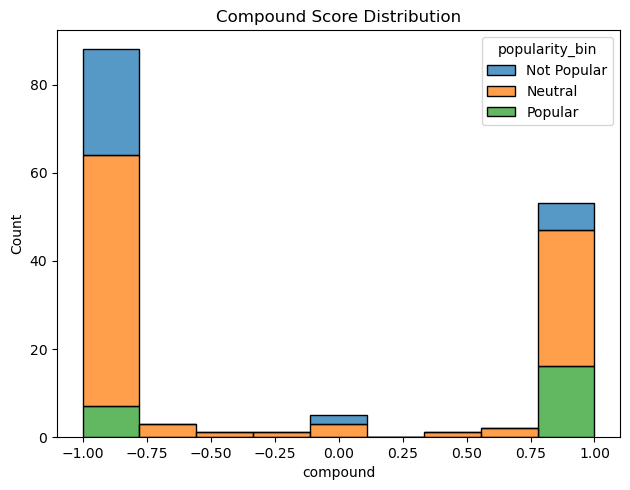

In [141]:
sns.histplot(df_sentiment, x = 'compound', hue='popularity_bin', multiple='stack')
plt.tight_layout()
plt.title('Compound Score Distribution')
plt.show()


Text(0.5, 1.0, 'Positive')

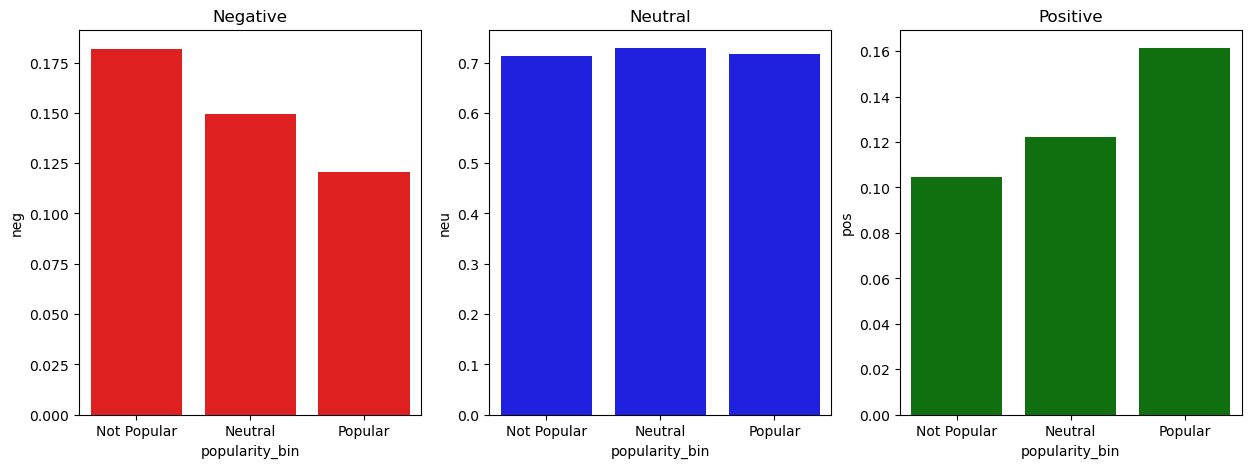

In [138]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
sns.barplot(df_sentiment, x = 'popularity_bin', y = 'neg', errorbar=('ci', 0), color = 'red', ax=axs[0])
sns.barplot(df_sentiment, x = 'popularity_bin', y = 'neu',errorbar=('ci', 0),  color = 'blue', ax=axs[1])
sns.barplot(df_sentiment, x = 'popularity_bin', y = 'pos',errorbar=('ci', 0),  color = 'green', ax=axs[2])

axs[0].set_title('Negative')
axs[1].set_title('Neutral')
axs[2].set_title('Positive')

# Roberta pretrained model


In [22]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax 

In [23]:
# Using pre trained model from Hugging face

model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [24]:
def roberta_model(text):
    encoded_text = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    return scores


In [25]:
df_roberta = df_lyrics.copy().reset_index()
df_roberta['R_neg'] = df['lyrics'].apply(lambda x: roberta_model(x)[0])
df_roberta['R_neu'] = df['lyrics'].apply(lambda x: roberta_model(x)[1])  
df_roberta['R_pos'] = df['lyrics'].apply(lambda x: roberta_model(x)[2])

df_roberta


,index,artist_name,track_name,track_id,album_name,album_id,release_date,popularity,explicit,danceability,...,type,duration,year,month,day_of_the_week,genres,lyrics,R_neg,R_neu,R_pos
0,0,"Tyler, The Creator",EARFQUAKE,5hVghJ4KaYES3BFUATCYn0,IGOR,5zi7WsKlIiUXv09tbGLKsE,2019-05-17,82,True,0.554,...,Studio Album,03:10,2019,May,Friday,"MySpotigramBot, Neo-Soul, alternative rnb, alt...",real real time real real real time fall short ...,0.389549,0.509415,0.101036
1,1,"Tyler, The Creator",See You Again (feat. Kali Uchis),7KA4W4McWYRpgf0fWsJZWB,Flower Boy,2nkto6YNI4rUYTLqEwWJ3o,2017-07-21,89,True,0.558,...,Studio Album,03:00,2017,July,Friday,"MySpotigramBot, rap, rnb, Neo-Soul, kali uchis",okay okay okay okay okay okay live dream state...,0.423802,0.480886,0.095312
2,2,"Tyler, The Creator",BEST INTEREST,3jHdKaLCkuNEkWcLVmQPCX,BEST INTEREST,5iUwaD3wFVwfaAfs9Z0eCh,2020-01-25,83,True,0.596,...,Single,02:07,2020,January,Saturday,"MySpotigramBot, Neo-Soul, pop rap, pop soul, t...",darling darling darling need worry couple thin...,0.088091,0.591336,0.320574
3,3,"Tyler, The Creator",Noid,1YdtGoSYDvVQKoUqSDXX41,CHROMAKOPIA,0U28P0QVB1QRxpqp5IHOlH,2024-10-28,82,True,0.380,...,Studio Album,04:44,2024,October,Monday,"Psychedelic Rock, experimental hip hop, Neo-So...",paranoid paranoid paranoid ayy thing feel orde...,0.525658,0.431227,0.043115
4,4,"Tyler, The Creator",ARE WE STILL FRIENDS?,5TxRUOsGeWeRl3xOML59Ai,IGOR,5zi7WsKlIiUXv09tbGLKsE,2019-05-17,80,True,0.216,...,Studio Album,04:25,2019,May,Friday,"MySpotigramBot, Neo-Soul, Psychedelic Soul, so...",dream dream long ago long ago long ago dream d...,0.301711,0.547977,0.150312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,Casey Veggies,DTA,6SfqAuzvIHbERSO5c613P0,Sleeping in Class,5VQnHe5Wcji6wNbiAnMQ21,2011-09-20,49,False,0.366,...,Feature,04:00,2011,September,Tuesday,NaN,ay aw man said said ill say aw aw aw man right...,0.328570,0.582523,0.088907
234,234,MellowHype,F666 the Police,0MfIT9RpAUGHjol2iQzXiq,Blackenedwhite,7KLG5Qk1Y9gLzSjdNdR96l,2011-07-12,21,True,0.520,...,Feature,03:12,2011,July,Tuesday,"Hip-Hop, alternative hip-hop",lyric found,0.574613,0.408745,0.016642
235,235,The Game,Martians Vs Goblins,1UIcqXAA24eg76EFWViwr5,The R.E.D. Album,6PvZnd9Q2ymDo3gpoM5I37,2011-01-01,51,True,0.476,...,Feature,03:48,2011,January,Saturday,"rap, Hip-Hop, 2010s, fucking, good rap",mar im motherfuckin martian em odd future wolf...,0.669487,0.276482,0.054031
236,236,Mike G,Timeless,5GYJvoJUMVyikb2D5sUwVg,Ali,5cVudF06zoMgAbXIRkk6aR,2010-04-11,20,True,0.606,...,Feature,03:11,2010,April,Sunday,banned,spend whole life tryna get cash work hard pas ...,0.478217,0.451831,0.069952


In [106]:
# Focusing only Tyler's songs/ Features appreances doesnt countd and no instrumentals
df_roberta = df_roberta[(df_roberta['type'] != 'Feature')]

In [117]:
df_roberta.dropna(subset='genres',inplace=True)

In [26]:
# Define bins for categorizing popularity values
bins = [0, 40, 70, float('inf')] 
labels = ['Not Popular', 'Neutral', 'Popular']  # Bin labels

# Adding a 'popularity_bin' column to categorize the popularity
df_roberta['popularity_bin'] = pd.cut(df_roberta['popularity'], bins=bins, labels=labels, right=False)

Text(0.5, 1.0, 'Positive (RoBERTa)')

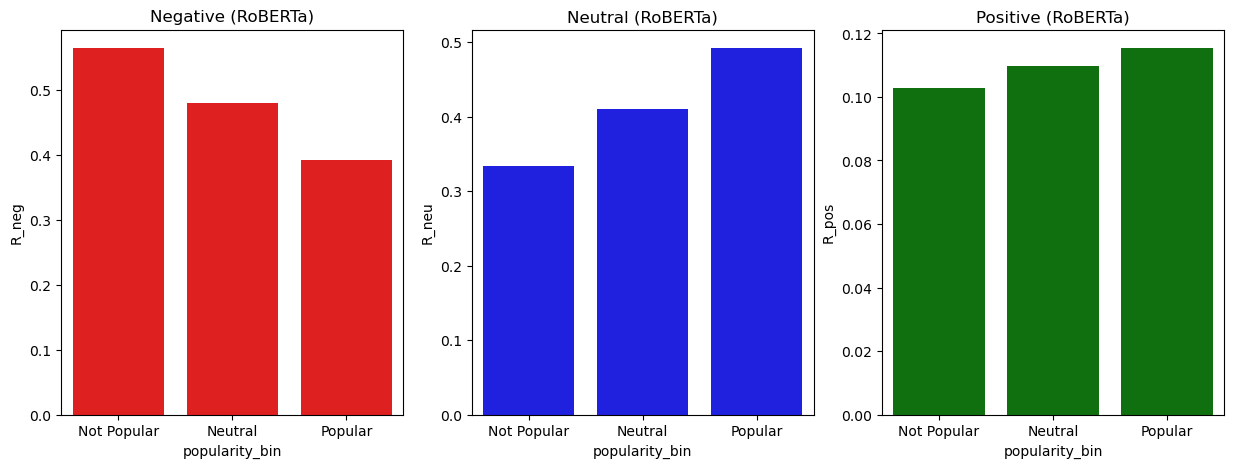

In [139]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
sns.barplot(df_roberta, x = 'popularity_bin', y = 'R_neg', errorbar=('ci', 0), color = 'red', ax=axs[0])
sns.barplot(df_roberta, x = 'popularity_bin', y = 'R_neu',errorbar=('ci', 0),  color = 'blue', ax=axs[1])
sns.barplot(df_roberta, x = 'popularity_bin', y = 'R_pos',errorbar=('ci', 0),  color = 'green', ax=axs[2])

axs[0].set_title('Negative (RoBERTa)')
axs[1].set_title('Neutral (RoBERTa)')
axs[2].set_title('Positive (RoBERTa)')


# Comparison 

In [125]:
# VADER
vader_compare = df_sentiment[['neg','neu','pos']].reset_index()

In [127]:
roberta_compare = df_roberta[['R_neg','R_neu','R_pos']].reset_index().drop(columns='index')

In [129]:
df_comparison = roberta_compare.join(vader_compare).drop(columns='index')
df_comparison

,R_neg,R_neu,R_pos,neg,neu,pos
0,0.389549,0.509415,0.101036,0.103,0.741,0.156
1,0.423802,0.480886,0.095312,0.112,0.688,0.200
2,0.088091,0.591336,0.320574,0.069,0.628,0.302
3,0.525658,0.431227,0.043115,0.204,0.691,0.105
4,0.301711,0.547977,0.150312,0.054,0.613,0.333
...,...,...,...,...,...,...
149,0.574613,0.408745,0.016642,0.000,1.000,0.000
150,0.806894,0.161564,0.031542,0.278,0.631,0.091
151,0.630054,0.301310,0.068635,0.260,0.629,0.111
152,0.154361,0.609937,0.235702,0.065,0.700,0.235


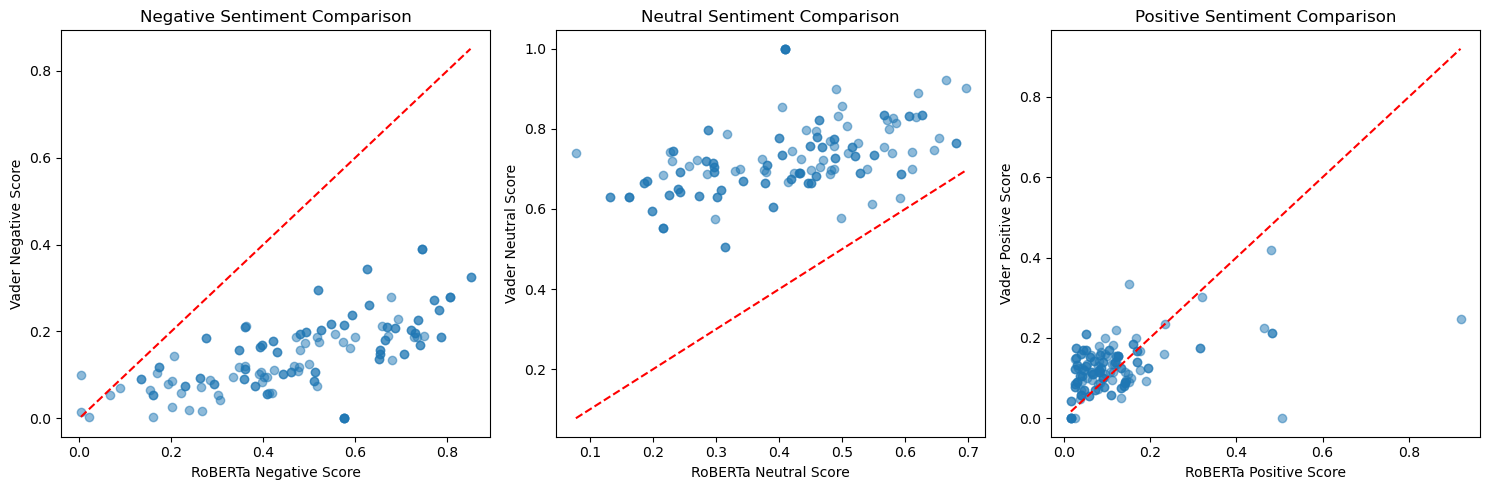

In [130]:
# Create a figure with 3 subplots (one for each sentiment category)
plt.figure(figsize=(15, 5))

# Negative sentiment comparison
plt.subplot(1, 3, 1)
plt.scatter(df_comparison['R_neg'], df_comparison['neg'], alpha=0.5)
plt.title('Negative Sentiment Comparison')
plt.xlabel('RoBERTa Negative Score')
plt.ylabel('Vader Negative Score')
plt.plot([df_comparison['R_neg'].min(), df_comparison['R_neg'].max()], 
         [df_comparison['R_neg'].min(), df_comparison['R_neg'].max()], 
         color='red', linestyle='--')  # Add diagonal line for reference

# Neutral sentiment comparison
plt.subplot(1, 3, 2)
plt.scatter(df_comparison['R_neu'], df_comparison['neu'], alpha=0.5)
plt.title('Neutral Sentiment Comparison')
plt.xlabel('RoBERTa Neutral Score')
plt.ylabel('Vader Neutral Score')
plt.plot([df_comparison['R_neu'].min(), df_comparison['R_neu'].max()], 
         [df_comparison['R_neu'].min(), df_comparison['R_neu'].max()], 
         color='red', linestyle='--')  # Add diagonal line for reference

# Positive sentiment comparison
plt.subplot(1, 3, 3)
plt.scatter(df_comparison['R_pos'], df_comparison['pos'], alpha=0.5)
plt.title('Positive Sentiment Comparison')
plt.xlabel('RoBERTa Positive Score')
plt.ylabel('Vader Positive Score')
plt.plot([df_comparison['R_pos'].min(), df_comparison['R_pos'].max()], 
         [df_comparison['R_pos'].min(), df_comparison['R_pos'].max()], 
         color='red', linestyle='--')  # Add diagonal line for reference

plt.tight_layout()
plt.show()

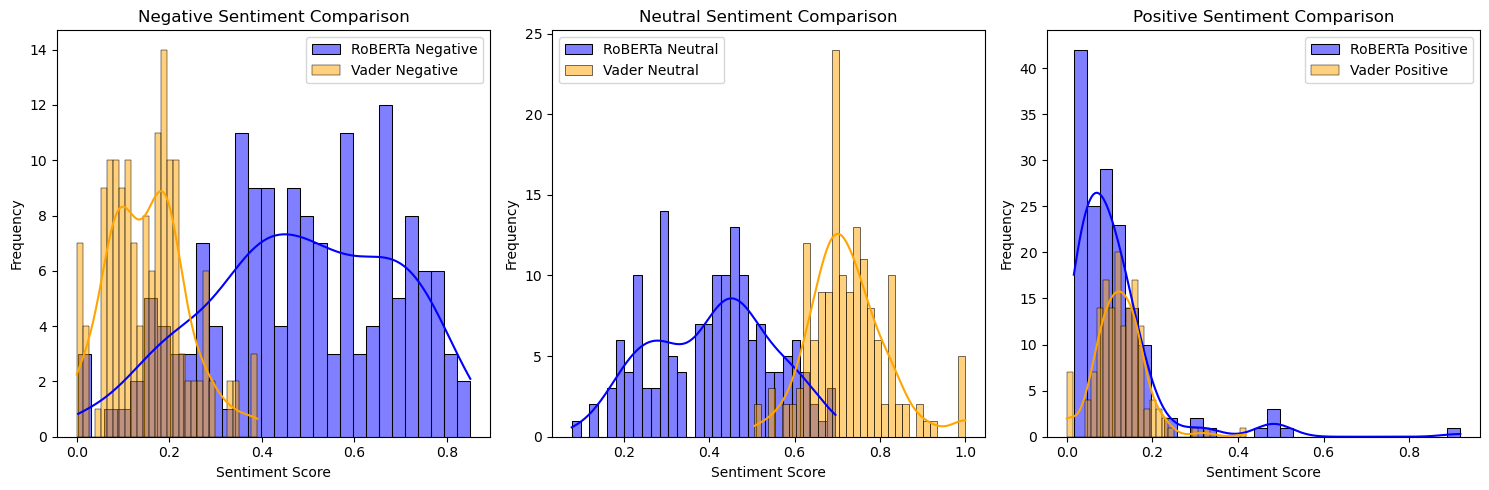

In [131]:
# Create a figure with 3 subplots (one for each sentiment category)
plt.figure(figsize=(15, 5))

# Negative sentiment comparison histogram
plt.subplot(1, 3, 1)
sns.histplot(df_comparison['R_neg'], color='blue', label='RoBERTa Negative', kde=True, alpha=0.5, bins=30)
sns.histplot(df_comparison['neg'], color='orange', label='Vader Negative', kde=True, alpha=0.5, bins=30)
plt.title('Negative Sentiment Comparison')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()

# Neutral sentiment comparison histogram
plt.subplot(1, 3, 2)
sns.histplot(df_comparison['R_neu'], color='blue', label='RoBERTa Neutral', kde=True, alpha=0.5, bins=30)
sns.histplot(df_comparison['neu'], color='orange', label='Vader Neutral', kde=True, alpha=0.5, bins=30)
plt.title('Neutral Sentiment Comparison')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()

# Positive sentiment comparison histogram
plt.subplot(1, 3, 3)
sns.histplot(df_comparison['R_pos'], color='blue', label='RoBERTa Positive', kde=True, alpha=0.5, bins=30)
sns.histplot(df_comparison['pos'], color='orange', label='Vader Positive', kde=True, alpha=0.5, bins=30)
plt.title('Positive Sentiment Comparison')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


In [146]:
compare_earfquake = df_lyrics.iloc[0]['lyrics']

In [147]:
sid.polarity_scores(compare_earfquake)

{'neg': 0.086, 'neu': 0.652, 'pos': 0.262, 'compound': 0.9977}

In [148]:
roberta_model(compare_earfquake)

array([0.4325214 , 0.50067645, 0.06680215], dtype=float32)

# Appendix (WordCloud)

In [59]:
from wordcloud import WordCloud
from PIL import Image

In [29]:
df_lyrics[df_lyrics['type']=='Studio Album']['album_name'].unique()

array(['IGOR', 'Flower Boy', 'CHROMAKOPIA', 'Goblin', 'Wolf',
       'CALL ME IF YOU GET LOST', 'Cherry Bomb'], dtype=object)

In [90]:
' '.join(df_lyrics['track_name']) 

"EARFQUAKE See You Again (feat. Kali Uchis) BEST INTEREST Noid ARE WE STILL FRIENDS? Noid St. Chroma (feat. Daniel Caesar) I Killed You NEW MAGIC WAND GONE, GONE / THANK YOU Tomorrow She I THINK Judge Judy Like Him (feat. Lola Young) Answer WUSYANAME (feat. Youngboy Never Broke Again & Ty Dolla $ign) A BOY IS A GUN* I Hope You Find Your Way Home RUNNING OUT OF TIME PUPPET DOGTOOTH FUCKING YOUNG / PERFECT (feat. Charlie Wilson, Chaz Bundick, Sydney Bennett & Kali Uchis) BOYFRIEND, GIRLFRIEND (2020 Demo) (feat. YG) SIR BAUDELAIRE (feat. DJ Drama) IGOR'S THEME WHAT'S GOOD I DON'T LOVE YOU ANYMORE SORRY NOT SORRY Who Dat Boy (feat. A$AP Rocky) Enjoy Right Now, Today WHAT A DAY WHARF TALK (feat. A$AP Rocky) Glitter Yonkers Lone Where This Flower Blooms (feat. Frank Ocean) HEAVEN TO ME HOT WIND BLOWS (feat. Lil Wayne) Boredom (feat. Rex Orange County & Anna of the North) Colossus Awkward 48 Tron Cat November 435 Pothole (feat. Jaden Smith) RUNITUP (feat. Teezo Touchdown) STUNTMAN (feat. Vinc

In [ ]:
# Extract track names and exclude any that contain 'Instrumental' or 'instrumental'
df_lyrics['track_name_only'] = df_lyrics['track_name'].apply(
    lambda x: re.match(r'^[^(]+', x).group(0).strip() if 'instrumental' not in x.lower() else None
)
df_lyrics = df_lyrics[df_lyrics['track_name_only'].notna()]

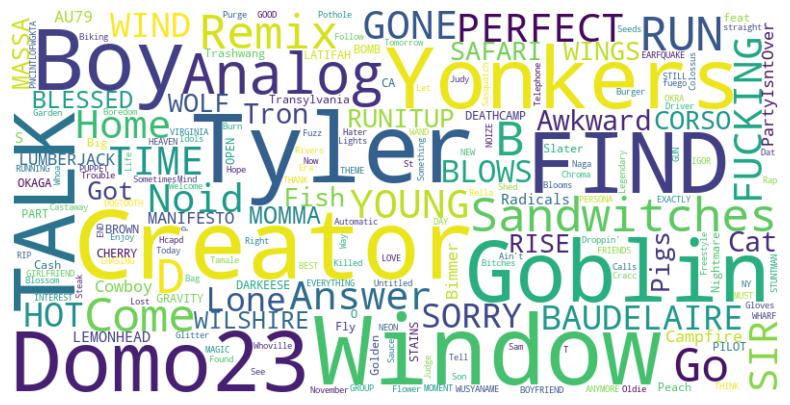

In [94]:
overall_text = ' '.join(df_lyrics['track_name_only'])
wordcloud = WordCloud(width=800, height=400, max_font_size=100, max_words=200, background_color='white').generate(overall_text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [80]:
mask  = np.array(Image.open('tyler1.png'))
mask


array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

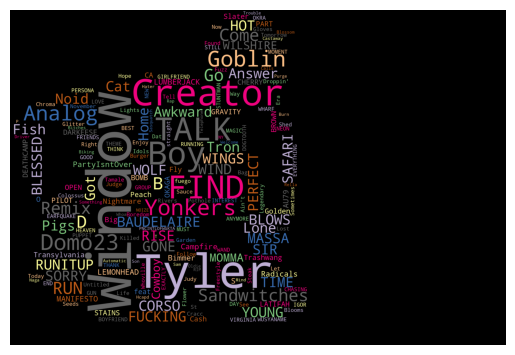

In [95]:
wc = WordCloud(background_color = 'black', mask = mask, contour_width = 2,
     contour_color = 'black', colormap = 'Accent', width = 10000, height = 500).generate(overall_text)
plt.axis("off")
plt.imshow(wc)

In [77]:
?WordCloud

Init signature:
WordCloud(
    font_path=None,
    width=400,
    height=200,
    margin=2,
    ranks_only=None,
    prefer_horizontal=0.9,
    mask=None,
    scale=1,
    color_func=None,
    max_words=200,
    min_font_size=4,
    stopwords=None,
    random_state=None,
    background_color='black',
    max_font_size=None,
    font_step=1,
    mode='RGB',
    relative_scaling='auto',
    regexp=None,
    collocations=True,
    colormap=None,
    normalize_plurals=True,
    contour_width=0,
    contour_color='black',
    repeat=False,
    include_numbers=False,
    min_word_length=0,
    collocation_threshold=30,
)
Docstring:     
Word cloud object for generating and drawing.

Parameters
----------
font_path : string
    Font path to the font that will be used (OTF or TTF).
    Defaults to DroidSansMono path on a Linux machine. If you are on
    another OS or don't have this font, you need to adjust this path.

width : int (default=400)
    Width of the canvas.

height : int (default=2